<a href="https://colab.research.google.com/github/Rahulhimself/Walmart-sales-prediction/blob/main/Walmart_by_RahulB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
%pip install seaborn
import seaborn as sns
from matplotlib import pyplot as plt

reading the dataset using pandas as pd and viewing top 5 data

In [ ]:
#reading the dataset
df=pd.read_csv('/content/Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


checking all columns date time year, synchronize to one format and checking the info

In [ ]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)
df['year']=df['Date'].dt.year
df['week']=df['Date'].dt.isocalendar().week
df['month']=df['Date'].dt.month
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   year          6435 non-null   int32  
 8   week          6435 non-null   UInt32 
 9   month         6435 non-null   int32  
dtypes: UInt32(1), float64(5), int32(2), int64(2)
memory usage: 483.9 KB


EDA

check if there any null values in dataset

In [ ]:
df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
year,0
week,0
month,0


checking if there are any duplicated rows are there in dataset

In [ ]:
df.duplicated().sum()

np.int64(0)

using boxplot from seaborn, plotting weekly sales

Text(0.5, 1.0, 'Weekly_sales box plot')

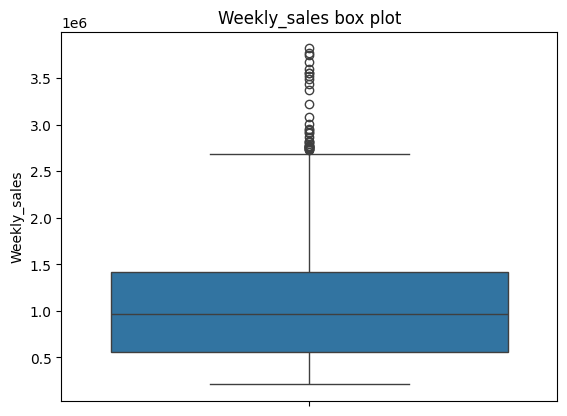

In [ ]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

checking if there are any outliers

In [ ]:
q1=df['Weekly_Sales'].quantile(0.25)
q3=df['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
threshold=1.5*iqr
df=df[(df['Weekly_Sales']>q1-threshold)&(df['Weekly_Sales']<q3+threshold)]

boxplot for weekly sales

Text(0.5, 1.0, 'Weekly_sales box plot')

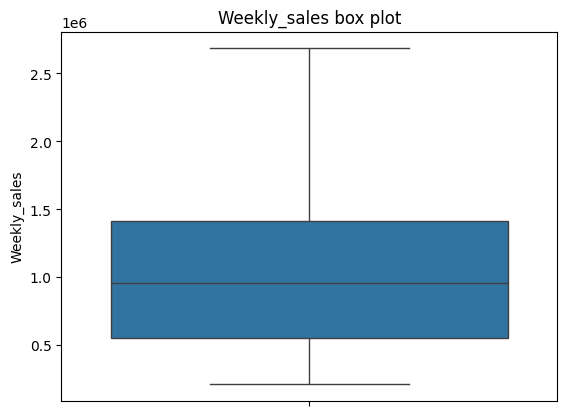

In [ ]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

Part A

finding the correlation between weekly sales and unemployment, listing all the stores againt all the values of emplyoment. plotting a barplot

Text(0.5, 1.0, 'correlation between unemploment and sales for different stores')

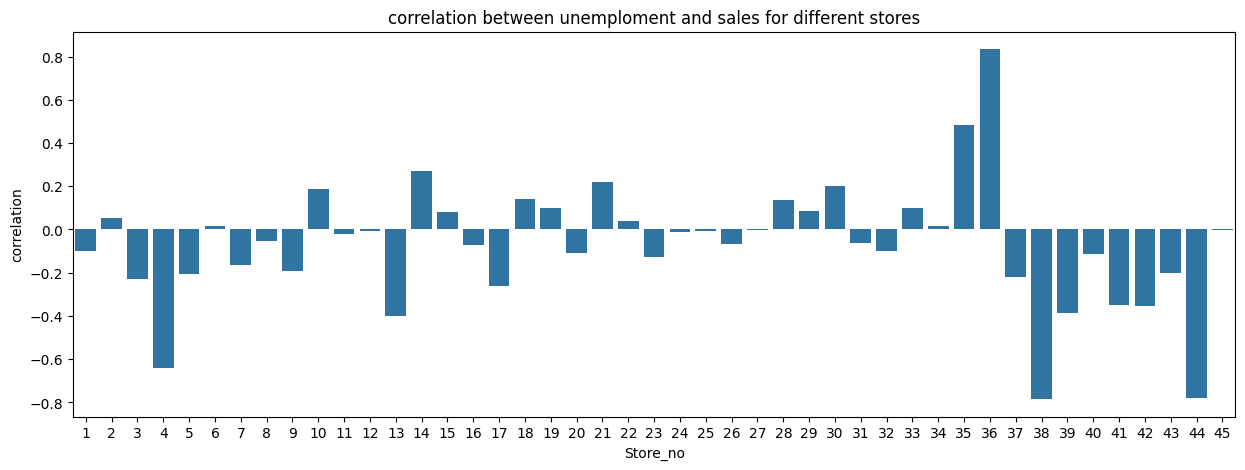

In [ ]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Unemployment']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('correlation')
plt.title('correlation between unemploment and sales for different stores')

From the above plot we can say that, there is both negative and positive correlation between weekly sales at the store and unemplyoment

Now, lets find the top 10 stores affected by the unemployment

In [ ]:
for i in range(1,len(se)+1):
    if se[i]<0:
        se[i]=se[i]*(-1)
# top 10 stores sales affected by unemployment
corr_df=pd.DataFrame(se,columns=['correlation'])
corr_df.index.name='Strone_no'
sorted_corr_df=corr_df.sort_values(by='correlation',ascending=False).iloc[:10,:]
print('List of top 10 affted stores: ',sorted_corr_df.index)
print(sorted_corr_df)

List of top 10 affted stores:  Index([36, 38, 44, 4, 35, 13, 39, 42, 41, 14], dtype='int64', name='Strone_no')
           correlation
Strone_no             
36            0.833734
38            0.785290
44            0.780076
4             0.639563
35            0.483865
13            0.400254
39            0.384681
42            0.356355
41            0.350630
14            0.269510


From above we can get the store number that are affected by employment and listing the top 10 sotres

PART B

with seaborn library we can plot lineplot indicating weekly sales through the years

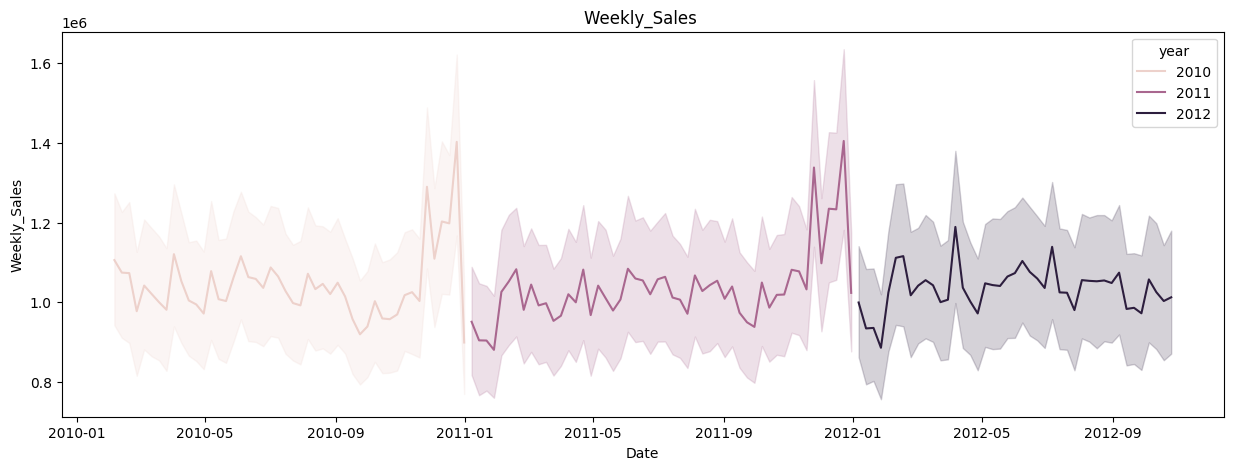

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index,y=df['Weekly_Sales'],hue=df['year'])
plt.title('Weekly_Sales ')
plt.show()

with seaborn library we cna plot boxplot indicating holiday flag and weekly sales columns from the dataset

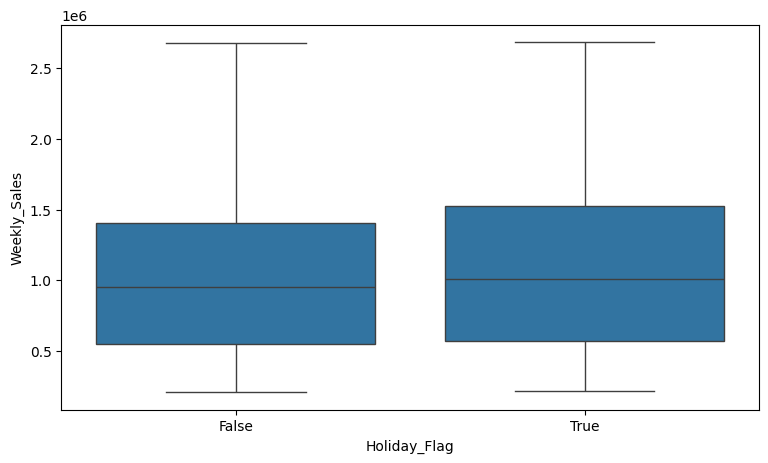

In [ ]:
plt.figure(figsize = (9,5))
sns.boxplot(x = 'Holiday_Flag', y ='Weekly_Sales', data = df)
# Mapping 0 to False and 1 to True in x-axis labels
plt.xticks([0, 1], ['False', 'True'])
plt.show()

visualizing average weekly sales of the stores over the years

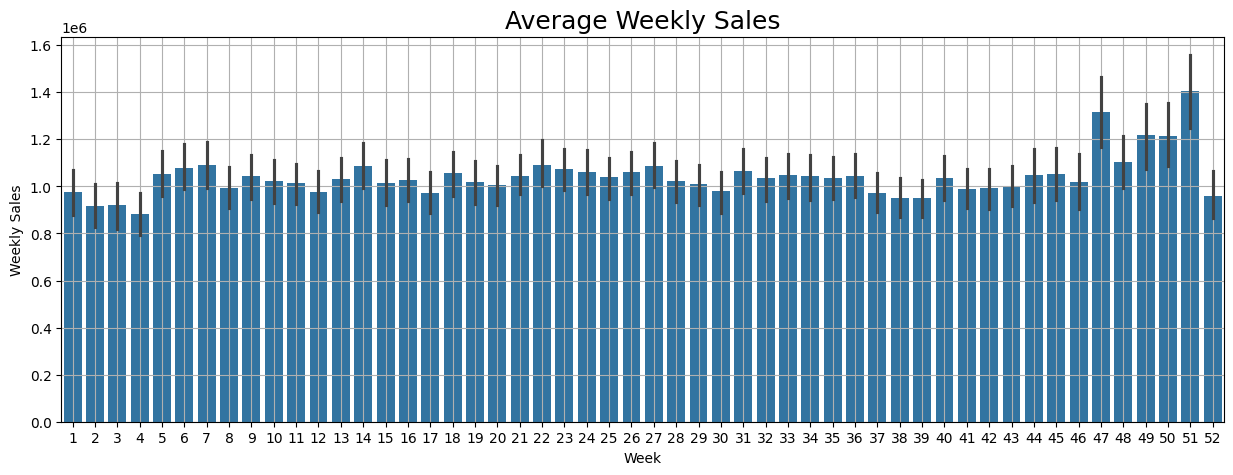

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='week',y='Weekly_Sales',data=df)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales')
plt.xlabel('Week')
plt.grid()
plt.show()

From all of the above plots, we can say that seasonality of the trends can be seen more(rises more) at the end of the year, because more number of holiday flags at the end of the year.

PART C

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
Date,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,6,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,7,2
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,8,2
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,9,3


Finding correlation between temperature and the weekly sales with barplot listing all the values with both temperature and the weekly columns

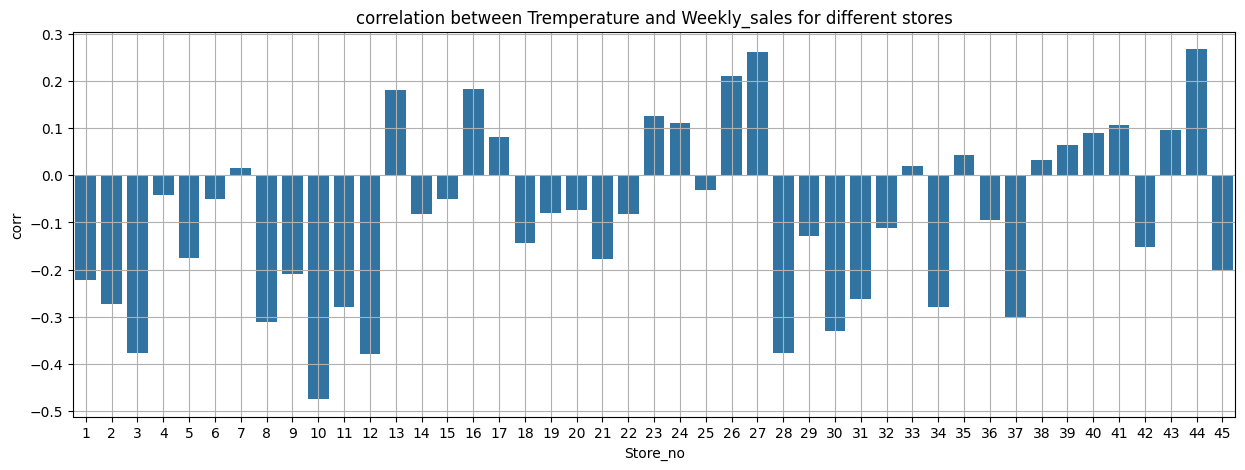

In [ ]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Temperature']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between Tremperature and Weekly_sales for different stores')
plt.grid()
plt.show()

as we can see store number 3,10,12,26,27....etc are showing some extreme ends we can further analyze by using scatter plot

Text(0.5, 1.0, 'Store_44')

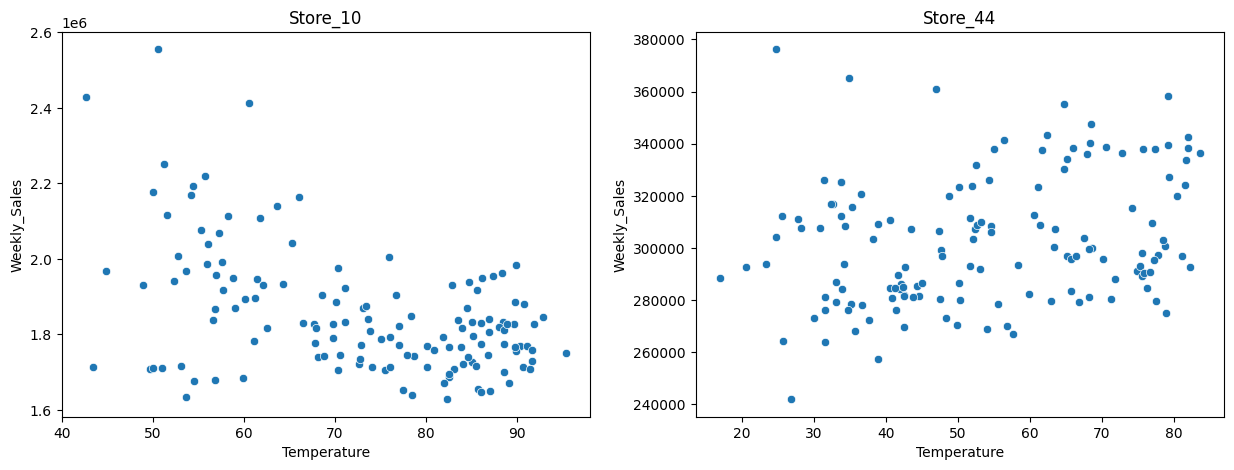

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_10=df[df['Store']==10]
sns.scatterplot(x=df_store_10['Temperature'],y=df_store_10['Weekly_Sales'])
plt.title('Store_10')

plt.subplot(1,2,2)
df_store_44=df[df['Store']==44]
sns.scatterplot(x=df_store_44['Temperature'],y=df_store_44['Weekly_Sales'])
plt.title('Store_44')

we can say from the above plots in some of the plot the weekly sale rises more than usual with temperature increase

PART D

Finding the correlation between weekly sale and CPI

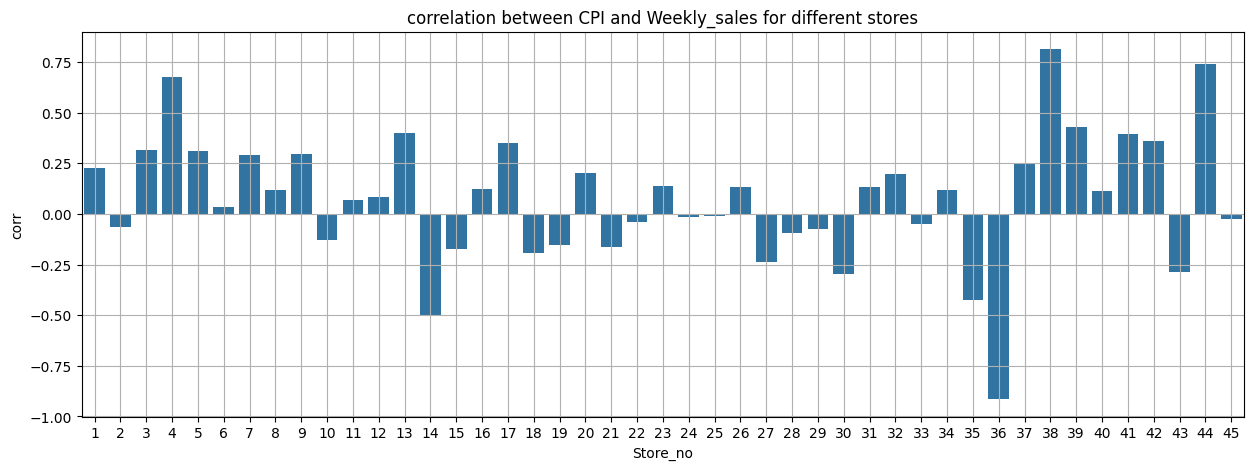

In [ ]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','CPI']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between CPI and Weekly_sales for different stores')
plt.grid()
plt.show()

as we can see there is a rise in sales at 36,38,44 stores

using scatter plot to visualize store 36 and

Text(0.5, 1.0, 'Store_44')

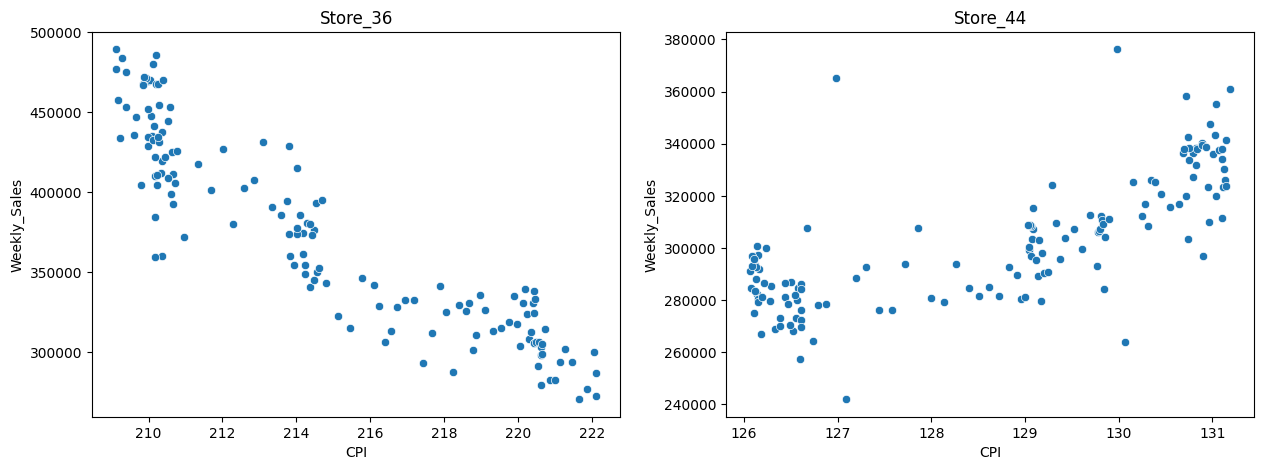

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_36=df[df['Store']==36]
sns.scatterplot(x=df_store_36['CPI'],y=df_store_36['Weekly_Sales'])
plt.title('Store_36')

plt.subplot(1,2,2)
df_store_44=df[df['Store']==44]
sns.scatterplot(x=df_store_44['CPI'],y=df_store_44['Weekly_Sales'])
plt.title('Store_44')

we can see negative and positive correlation in store 36 and 44 respectively

PART E

we can find the top performing stores by plotting the barplot between weekly sales and stores

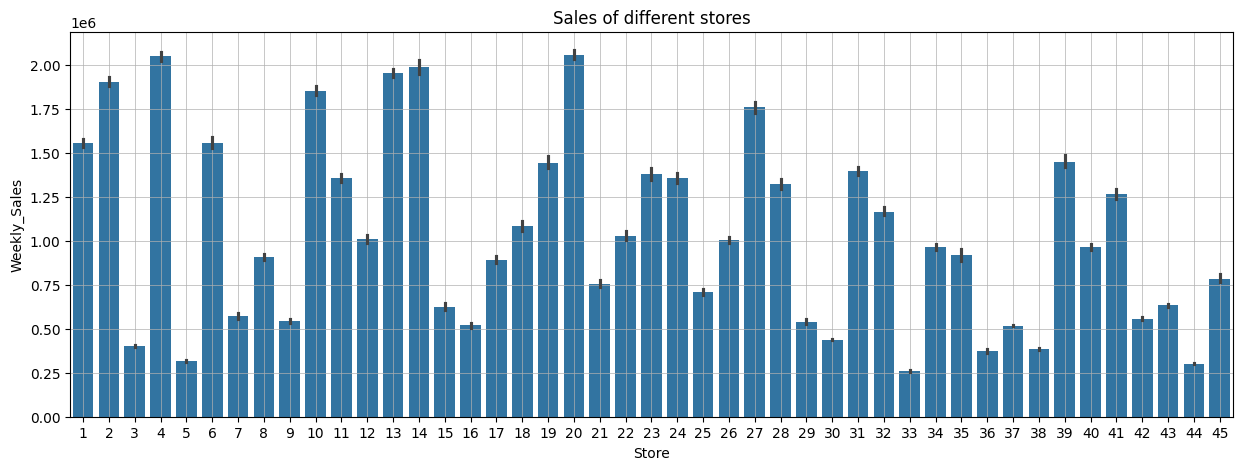

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Sales of different stores')
plt.grid(linewidth=0.5)

In [ ]:
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=False)
print('Top 10 best performed stores:')
print(list(sorted_ser.index[:10]))

Top 10 best performed stores:
[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


From above we can conclude the top 10 performing stores in weekly sales

PART F

We can find the worst performing stores grouping and sorting weekly sales of the dataset

In [ ]:
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=True)
print('List of 10 Worst performed stores:')
print(list(sorted_ser.index[:10]))

List of 10 Worst performed stores:
[33, 44, 5, 36, 38, 3, 30, 37, 16, 29]


finding the significant value between highest and lowest stores weekly sales

In [ ]:
highest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=False).values[0]
lowest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=True).values[0]

print('highest_sale_of_a_store:',np.round(highest_sale_of_a_store,2))
print('lowest_sale_of_a_store:',np.round(lowest_sale_of_a_store,2))
print('')
print('the difference between the highest and lowest performing stores: ')
print(np.round(highest_sale_of_a_store-lowest_sale_of_a_store,2))

highest_sale_of_a_store: 2058998.05
lowest_sale_of_a_store: 259861.69

the difference between the highest and lowest performing stores: 
1799136.36
